In [24]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

def preprocess_image(image):
    #convert the image to RGB
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # compute histogram from image
    histogram = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    # nomalize the histogram
    image_histogram = cv2.normalize(histogram, histogram).flatten()
    return image_histogram

def create_image_dict(directory):
    image_dict = dict()
    for filename in os.listdir(directory):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.gif')): 
            image = cv2.imread(os.path.join(directory, filename))
            image = preprocess_image(image)
            item = {filename : image}
            image_dict.update(item)
    return image_dict

road_signs_path = 'road_safety_signs'
road_signs_data = create_image_dict(road_signs_path)

def read_image(image_path):
    # read the image from path
    image = cv2.imread(image_path)

    # check if image is fine
    if image is None:
        print("We cannot the image.")
        return None
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
    
    return image

def find_best_match(uploaded_image):
    # extract image feature
    uploaded_image_histogram = preprocess_image(uploaded_image)
    
    # calculate the similarity with dataset
    best_match = None
    best_similarity = float('inf')
    
    for name, image in road_signs_data.items():
        similarity = cosine(uploaded_image_histogram, image)
        if similarity < best_similarity:
            best_similarity = similarity
            best_match = name

    return best_match

input the image file path..bicycle_only.png


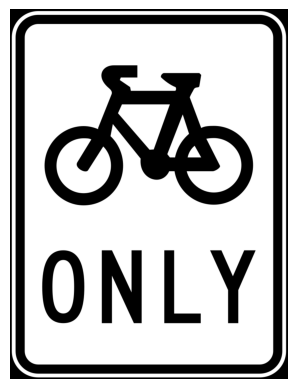

Sign name :Bicycles Only
Description : The area is designating exclusively for bicycle use, these signs prohibit entry to motor vehicles.


In [26]:
def main():
    #set the csv file path
    csv_file = 'road_signs.csv'
    
    #load the dataset 
    datasets = pd.read_csv(csv_file)
    
    # input the image path
    image_path = input("input the image file path..")
    
    # read the image
    image = read_image(image_path)
    if image is None:
        return
    
    best_match = find_best_match(image)
    
    # get the name and description data from a datasets where the image name matches the best match
    match_name = datasets.loc[datasets['image'] == best_match, 'name'].iloc[0]
    match_description = datasets.loc[datasets['image'] == best_match, 'description'].iloc[0]
    
    print(f"Sign name :{match_name}")
    print(f"Description : {match_description}")
    
if __name__ == "__main__":
    main()